In [1]:
import numpy as np
import cv2 as cv
import os
from tqdm import tqdm
from PIL import Image

test_images = "./cropped_images/"

In [2]:
def feature_images_to_array(folder):
    images = [os.path.join(root, filename)
             for root, dirs, files in os.walk(folder)
             for filename in files
             if [filename]]
    ic = []
    for img in tqdm(images):
        img_array = cv.imread(img)
        ic.append(img_array)
    X = np.asarray(ic)
    return X

In [75]:
x = feature_images_to_array(test_images)

100%|██████████| 615/615 [00:00<00:00, 18190.32it/s]


In [82]:
b, g, r = cv.split(x[200])

In [83]:
r.shape

(50, 50)

In [85]:
import matplotlib.pylab as plt

In [86]:
def plti(im, h=8, **kwargs):
    """
    Helper function to plot an image.
    """
    y = im.shape[0]
    x = im.shape[1]
    w = (y/x) * h
    plt.figure(figsize=(w,h))
    plt.imshow(im, interpolation="none", **kwargs)
    plt.axis('off')

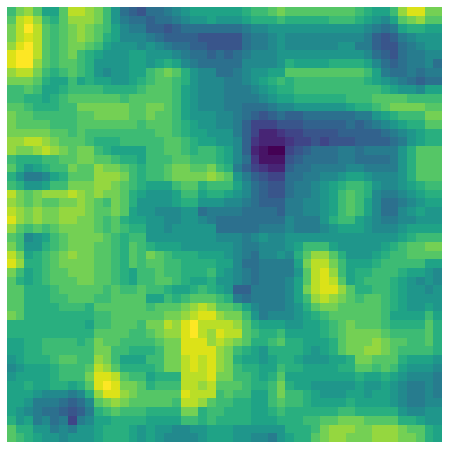

In [87]:
plti(r)

In [89]:
print(f'Average Red: {int(np.mean(r))}')

Average Red: 197
